# Python 函數繪圖練習

1. $f(x)=\frac{\sin x}{x} , \, -3\pi \le x\le 3\pi$ ，並從圖猜測 $\textstyle \lim_{x \to 0} f(x) = $ ?，
再加入第二與第三個函數 $g(x)=\frac{\sin (x^2)}{x} ，h(x)=\frac{\sin^2{(2x)}}{x^2}$ ，同時猜測 $\textstyle \lim_{x \to 0} g(x) = $ ? ， $\textstyle \lim_{x \to 0} h(x) = $ ? 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


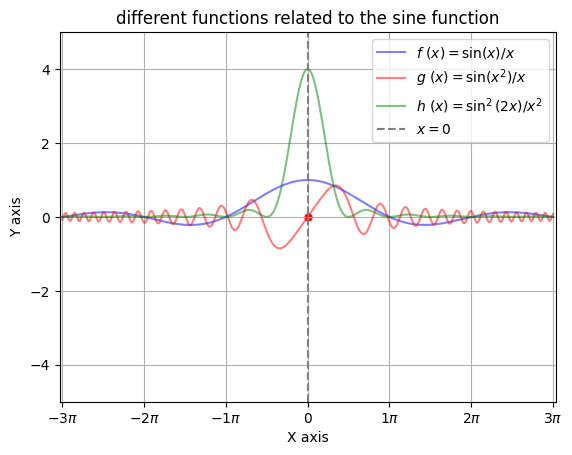

In [1]:
# 載入套件
import matplotlib.pyplot as plt
import numpy as np
import math as math 

n = 1000 # number of points
x = np.linspace( -3*math.pi , 3*np.pi , n ) # create a x vector
y1 = np.sin(x)/x # compute y
y2 =  np.sin(x**2)/x
y3 = np.sin(2*x)**2/x**2

#plot
plt.plot(x ,y1 ,color='blue', alpha = 0.5)
plt.plot(x ,y2 ,c='red', alpha = 0.5)
plt.plot(x ,y3 ,c='green', alpha = 0.5)
plt.axvline(0,c="gray",linestyle='--') 
plt.scatter([0], [0], s=25, c='r')  # stroke, colour

plt.xlim([-3*math.pi-0.1,3*np.pi+0.1]) , plt.ylim(-5,5)
plt.grid(visible=True)

plt.xlabel('X axis') , plt.ylabel('Y axis')
plt.title('different functions related to the sine function')
plt.legend([r'$f\ (x)=\sin(x)/x$',r'$g\ (x)=\sin(x^2)/x$',r'$h\ (x)=\sin^2(2x)/x^2$','$x=0$']) #會依線的順序
plt.xticks(np.pi*np.array([-3,-2,-1,0,1,2,3]) , 
           ['$-3\pi$','$-2\pi$','$-1\pi$','0','$1\pi$','$2\pi$','$3\pi$']
           )

#plt.show() # just for py fil
plt.savefig('statcomp_hw2_plot1.eps')



*plt.grid  
    1.plt.grid(False)：禁用圖表的網格線。  
    2.plt.grid(axis='x')：僅在x軸上啟用網格線。  
    3.plt.grid(axis='both')：同時在x軸和y軸上啟用網格線。  

2. $f(x) = \frac{e^{\alpha x}}{e^{\alpha x} +1}$ , 畫出漸近線與函數爬升的趨勢。

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


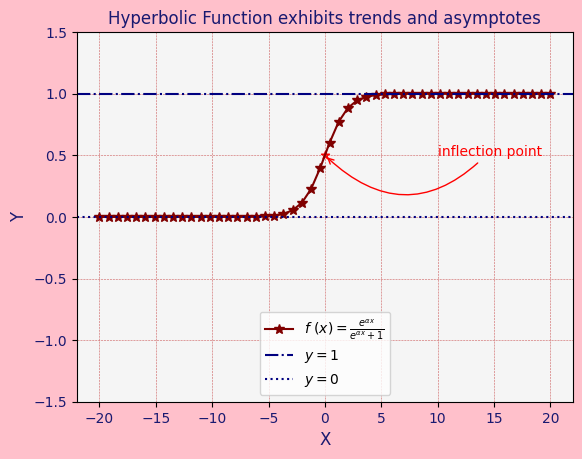

In [2]:
import matplotlib.pyplot as plt
import numpy as np

n = 50
x = np.linspace(-20 , 20 , n )
alpha=1
y = np.exp(alpha*x)/(np.exp(alpha*x)+1)

#plot
plt.figure(facecolor='pink',edgecolor='black') #背景及框線設定
plt.axes(facecolor='whitesmoke')

plt.plot(x ,y ,color='maroon' ,marker="*" , markersize='7',
         label=r'$f\ (x)=\frac{e^{\alpha x}}{e^{\alpha x}+1}$')
plt.axhline(1,color="navy" ,ls='-.' ,label='$y=1$') 
plt.axhline(0,color="navy" ,ls=':',label='$y=0$') 
plt.scatter([0], [0.5], c='r',marker="*")
plt.annotate('inflection point',
             xy=(0,0.5) ,xytext=(10,0.5), 
             arrowprops={
                'arrowstyle': '->',
                'connectionstyle':'arc3, rad=-0.5',
                'color':'red'},
            color='red',fontsize=10)

plt.title("Hyperbolic Function exhibits trends and asymptotes",fontsize=12,color='midnightblue')
plt.ylim(-1.5,1.5)
plt.grid(True ,ls="--",color='indianred',linewidth=0.4) #linewidth影響線的明顯度
plt.legend(loc='lower center')
plt.xlabel('X',fontsize='large',color='midnightblue') , plt.ylabel('Y',fontsize='large',color='midnightblue')
plt.xticks(color='midnightblue'),plt.yticks(color='midnightblue')

#存圖
plt.savefig('statcomp_hw2_plot2.eps')


3. $f(x) = e^{-x/10} \sin (x)$ , 畫出震盪幅度逐漸變小的趨勢。

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


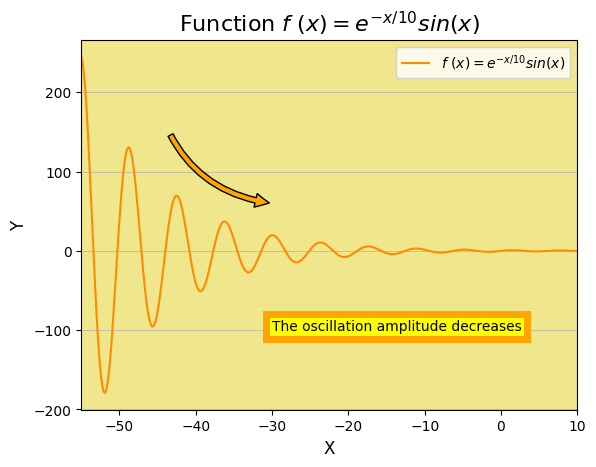

In [3]:
import matplotlib.pyplot as plt
import numpy as np

n = 400
x = np.linspace(-55 , 10 , n )
y = np.exp(-x/10)*np.sin(x)

#plot
plt.axes(facecolor='khaki')

plt.plot(x, y, color='darkorange',
         label=r'$f\ (x) = e^{-x/10}sin(x)$')

plt.title(r"Function $f\ (x) = e^{-x/10}sin(x)$",fontsize=16)
plt.xlabel('X',fontsize='large') , plt.ylabel('Y',fontsize='large')
plt.grid(axis='y',linewidth=0.5)
plt.legend(loc='upper right')

plt.annotate(' ',
            xy=(-30,60),
            xytext=(-45,160),
            arrowprops={
                'arrowstyle':'simple',
                'facecolor':'orange',
                'connectionstyle':'arc3, rad=0.3'},
            fontsize=20)

plt.text(-30,-100,'The oscillation amplitude decreases',fontsize=10,rotation=0,bbox={
    'boxstyle':'Square',
    'facecolor':'yellow',
    'edgecolor':'orange',
    'pad':0.4,
    'linewidth':5}
    )

plt.xlim(-55, 10)

plt.savefig('statcomp_hw2_plot3.eps')

4.$f(x) = \frac{1}{x-2}$ , 劃出漸進線的趨勢。分母為0的計算會引發警告，可以在設定 x 軸範圍時避開。譬如 np.setdiff1d(np.linspace(-5, 5, 200),[0]) 。

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


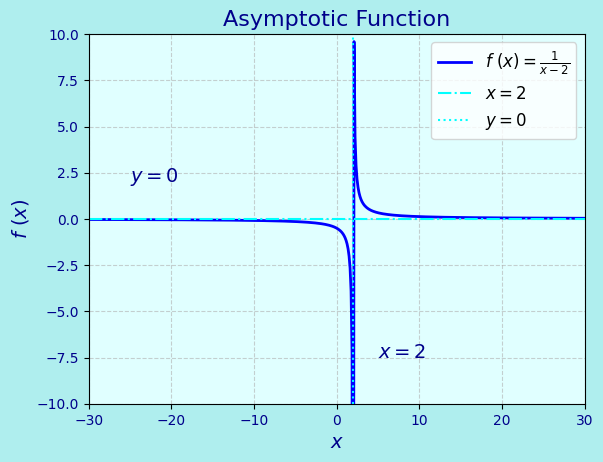

In [4]:
import matplotlib.pyplot as plt
import numpy as np

n=500
x_values = np.linspace(-30, 30, n)
y_values = []

def f_with_warning(x):
    if x == 2:
        raise Warning("Warning: Division by zero (x = 2)")
    return 1 / (x - 2)

for x in x_values: #偵錯
    try:
        y = f_with_warning(x)
        y_values.append(y)
    except Warning as e:
        print(e)

#plot
plt.figure(facecolor='#AFEEEE',edgecolor='darkblue') # 設置圖形尺寸 figsize=(10, 6)
plt.axes(facecolor='lightcyan')
plt.xticks(color='darkblue'),plt.yticks(color='darkblue')

plt.plot(x_values, y_values, label=r'$f\ (x) = \frac{1}{x-2}$', color='b', linewidth=2)
plt.axhline(0,color="cyan" ,ls='-.' ,label='$x=2$') 
plt.axvline(2,color="cyan" ,ls=':',label='$y=0$') 

plt.xlim(-30, 30),plt.ylim(-10, 10)
plt.xlabel('$x$', fontsize=14 ,color='darkblue'),plt.ylabel(r'$f\ (x)$', fontsize=14 ,color='darkblue')
plt.title('Asymptotic Function', fontsize=16 ,color='darkblue')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.text(5,-7.5,'$x=2$',fontsize=14,rotation=0,color='darkblue')
plt.text(-25,2,'$y=0$',fontsize=14,rotation=0,color='darkblue')

plt.savefig('statcomp_hw2_plot4.eps')

5.$f(x) = x^3 + 2$ , 繪製 $f(x)$ 與 $f^{-1}(x)$ 在同一張圖上並展示其互為反函數的對稱性。

C:\Users\yangs\AppData\Local\Temp\ipykernel_13800\1816356168.py:8: RuntimeWarning: invalid value encountered in power
  return (y - 2)**(1/3)
C:\Users\yangs\AppData\Local\Temp\ipykernel_13800\1816356168.py:14: RuntimeWarning: invalid value encountered in power
  y3 = -pow(-x+2,1/3)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


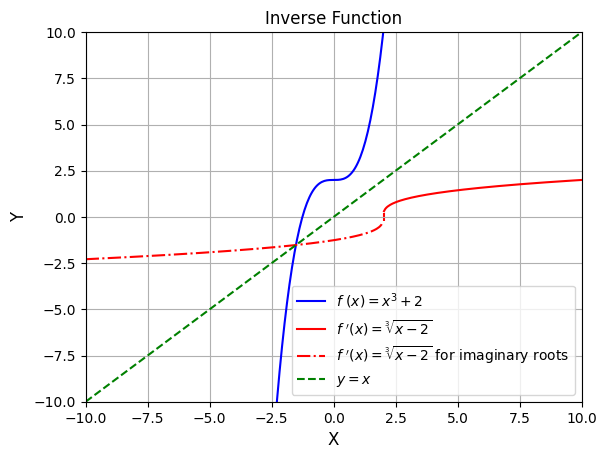

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#定義原始函與反函數
def f(x):
    return x**3 + 2
def inverse_f(y):
    return (y - 2)**(1/3)
x = np.linspace(-10, 10, 400)
y = f(x)
y_inverse = inverse_f(x)
# 直接寫一個函數解無法呈現虛數值問題
x3 = np.linspace(-10, 10, 400)
y3 = -pow(-x+2,1/3)

plt.plot(x, y, label=r'$f\ (x) = x^3 + 2$', color='blue')
plt.plot(x, y_inverse, label=r"$f\ '(x) = \sqrt[3]{x-2} $", color='red')
plt.plot(x3, y3,ls='-.', label=r"$f\ '(x) = \sqrt[3]{x-2} $ for imaginary roots", color='red')
plt.plot(x, x, linestyle='--', color='green', label='$y=x$')
plt.scatter(2.035, -0.01, color='r' , marker='|')

plt.legend()
plt.title("Inverse Function")
plt.xlabel("X" ,fontsize='large')
plt.ylabel("Y" ,fontsize='large')

plt.xlim(-10, 10) ,plt.ylim(-10, 10)
plt.grid(True)

plt.savefig('statcomp_hw2_plot5.eps')

6. $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(x-3)^2}{2}}$ ，畫出這張知名圖形的特色。

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


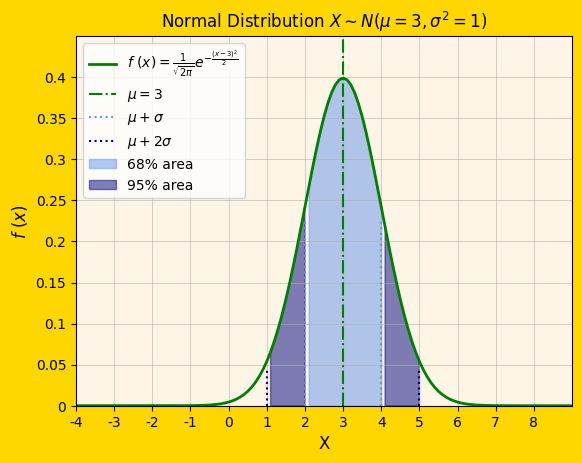

In [6]:
import numpy as np
import matplotlib.pyplot as plt

sep = 0.1
x_min = -10
x_max = 10
x = np.arange(x_min ,x_max ,sep)
def f(x) : return (1/np.sqrt(2*np.pi))*np.exp((-(x-3)**2)/2)

#plot
plt.figure(facecolor='gold')
plt.axes(facecolor='oldlace')

plt.plot(x ,f(x) ,label=r'$f\ (x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(x-3)^2}{2}}$',
         linewidth=2 ,color='green')
plt.axvline(3,color="green" ,ls='-.',label='$\mu = 3$',linewidth=1.5) 
plt.axvline(4,0,0.5,color="#6495ED" ,ls=':' ,label='$\mu + \sigma$' ,linewidth=1.5) 
plt.axvline(2,0,0.5,color="#6495ED" ,ls=':',linewidth=1.5) 
plt.axvline(5,0,0.1,color="navy" ,ls=':',label='$\mu + 2\sigma$' ,linewidth=1.5) 
plt.axvline(1,0,0.1,color="navy" ,ls=':',linewidth=1.5) 

plt.fill_between(x, f(x), where=[(xi >= 3 - 1 * 1) and (xi <= 3 + 1 * 1) for xi in x] , 
                 color='#6495ED', alpha=0.5, label='68% area')
plt.fill_between(x, f(x), where = [(xi >= 4) and (xi <= 5) or 
                                   (xi >= 1) and (xi <= 2) for xi in x] , 
                 color='navy', alpha=0.5, label='95% area')

plt.legend(loc='upper left',fontsize=10)
plt.title("Normal Distribution $X \sim  N(\mu = 3,\sigma^2 = 1)$")
plt.xlabel("X" ,fontsize='large')
plt.ylabel(r"$f\ (x)$" ,fontsize='large')

#處理刻度
#將陣列轉為字串的自訂function
#浮點數溢出問題使用round 根直接取小數位後幾位處理不了 #圖表小數位過長導致左邊圖表空間拉長
def fun_num_to_str(my_numbers) :
    separator = ','
    if isinstance(my_numbers, float) :
        formatted_str = my_numbers.split(',')
        result = [f"{num:.2f}" for num in formatted_str]
        return(result)
    else:
        result = separator.join(str(num) for num in my_numbers)
        result = result.split(',')
        return(result)

x_margin = np.arange(-9,9,1)
y_margin = np.arange(0,0.45,0.05)
x_margin_str = fun_num_to_str(x_margin)
plt.yticks(y_margin,['0','0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4'])
plt.xticks(x_margin,x_margin_str)

plt.xlim(-4, 9) ,plt.ylim(0, 0.45)
plt.grid(True,linewidth=0.4)

plt.savefig('statcomp_hw2_plot6.eps')

7. $f(x) = 3 x^3 - x^4$ ， 透過 X 軸範圍的選擇，觀察函數是否有最大值？是否看得出函數有幾個實數根？

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


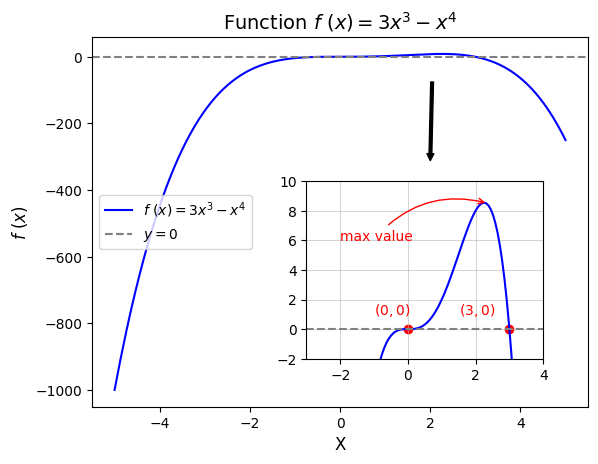

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 150
x = np.linspace(-5 , 5, n )
y = 3*(x**3) - x**4

fig = plt.figure() #創建一個新的圖形對象
ax = plt.gca() #獲取當前子圖對象 #塞入縮圖

plt.plot(x ,y ,label=r'$f\ (x) = 3 x^3 - x^4$' ,color='blue')
plt.axhline(0 ,label='$y=0$',ls='--',color='gray')

plt.title(r"Function $f\ (x) = 3 x^3 - x^4$" ,fontsize=14)
plt.xlabel("X" ,fontsize='large')
plt.ylabel(r"$f\ (x)$" ,fontsize='large')
plt.legend(loc = 'center left')

plt.annotate(' ',
            xy=(2,-320),
            xytext=(2,-50),
            color='black',
            arrowprops={
                'arrowstyle':'simple',
                'color':'black'},
            fontsize=10)

#注意子圖的寫法
insert_ax = fig.add_axes([0.46,0.21,0.37,0.37]) #塞入縮圖位置
insert_ax.plot(x ,y ,color='blue') 
insert_ax.scatter([0], [0], c='r' ) #三重根 0
insert_ax.scatter([3], [0], c='r') #實數根 3
insert_ax.axhline(0 ,ls='--',color='gray') 
insert_ax.set_ylim(-2,10) , insert_ax.set_xlim(-3,4)
insert_ax.grid(True ,linewidth=0.4) 
insert_ax.annotate('max value',
            xy=(2.37,8.5),
            xytext=(-2,6),
            color='red',
            arrowprops={
                'arrowstyle':'->',
                'color':'red',
                'connectionstyle':'arc3, rad=-0.3'},
            fontsize=10)
insert_ax.text(-1,1,'$(0,0)$',fontsize=10 , c='r')
insert_ax.text(1.5,1,'$(3,0)$',fontsize=10 , c='r')

plt.savefig('statcomp_hw2_plot7.eps')



8. $f(x) = \frac{\mathrm{ln}x}{x^2} $ ，圖形必須清楚地呈現出最大值的大概位置與右邊漸近線的趨勢。

C:\Users\yangs\AppData\Local\Temp\ipykernel_13800\691288548.py:6: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)/x**2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


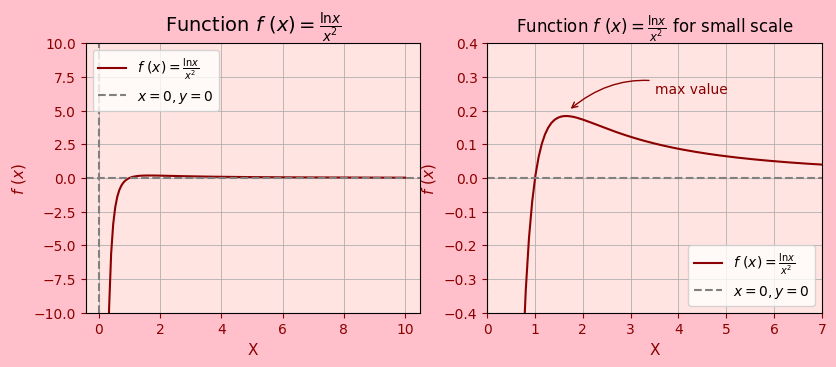

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n = 150
x = np.linspace(0 , 10, n )
y = np.log(x)/x**2

#圖空間排版
fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(9.5,3.5),facecolor='pink')

ax[0].set_facecolor("mistyrose")
ax[0].plot(x ,y ,label=r'$f\ (x) = \frac{\mathrm{ln}x}{x^2}$' ,color='darkred')
ax[0].axhline(0 ,label='$x=0,y=0$',ls='--',color='gray')
ax[0].axvline(0 ,ls='--',color='gray')
ax[0].set_ylim(-10,10)  # set_
ax[0].set_title(r"Function $f\ (x) = \frac{\mathrm{ln}x}{x^2}$" ,fontsize=14)   # set_
ax[0].set_xlabel("X" ,fontsize=11) # set_
ax[0].set_ylabel(r"$f\ (x)$" ,fontsize=11) # set_
ax[0].legend(loc = 'upper left')
ax[0].grid(True ,linewidth=0.6) 
ax[0].xaxis.label.set_color('darkred')  #
ax[0].yaxis.label.set_color('darkred')  #
ax[0].tick_params(axis='x', colors='darkred')  #
ax[0].tick_params(axis='y', colors='darkred')  #

ax[1].set_facecolor("mistyrose")
ax[1].plot(x ,y ,label=r'$f\ (x) = \frac{\mathrm{ln}x}{x^2}$' ,color='darkred')
ax[1].axhline(0 ,label='$x=0,y=0$',ls='--',color='gray')
ax[1].axvline(0 ,ls='--',color='gray')
ax[1].set_xlim(0,7) , ax[1].set_ylim(-0.4,0.4)  
ax[1].set_title(r"Function $f\ (x) = \frac{\mathrm{ln}x}{x^2}$ for small scale" ,fontsize=12)   
ax[1].set_xlabel("X" ,fontsize=11) 
ax[1].set_ylabel(r"$f\ (x)$" ,fontsize=11) 
ax[1].legend(loc = 'lower right')
ax[1].grid(True ,linewidth=0.6) 
ax[1].xaxis.label.set_color('darkred')  
ax[1].yaxis.label.set_color('darkred')  
ax[1].tick_params(axis='x', colors='darkred')  
ax[1].tick_params(axis='y', colors='darkred')  
ax[1].annotate('max value',
            xy=(1.7,0.2),
            xytext=(3.5,0.25),
            color='darkred',
            arrowprops={
                'arrowstyle':'->',
                'color':'darkred',
                'connectionstyle':'arc3, rad=0.3'},
            fontsize=10)

plt.savefig('statcomp_hw2_plot8.eps')

9.$$ f(x) = \begin{cases} 1\ ,\ 1\le x<3\\ 2\ ,\ 3\le x<5\\ 3\ ,\ 5\le x<7\end{cases}$$


In [9]:
import numpy as np
import matplotlib.pyplot as plt

########建立 n*3 矩陣範例############

## 因為 x 不等三所以不適合用此方法

n = 4  
result_matrix = np.zeros((n, 3))

for i in range(n):
    start_value = i*2+1  # 每一列的起始值
    column_values = np.arange(start_value, start_value + 3,1)
    result_matrix[i,:] = column_values
    
print(result_matrix)


[[1. 2. 3.]
 [3. 4. 5.]
 [5. 6. 7.]
 [7. 8. 9.]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


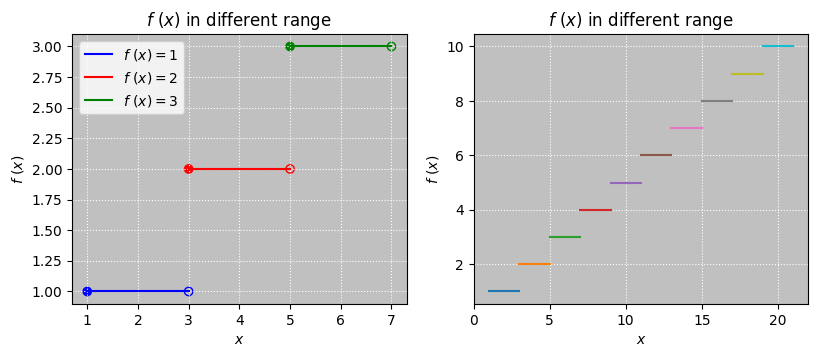

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 2.99999999, 100)
y = np.full_like(x, 1)

#plot1
fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(9.5,3.5))

ax[0].set_facecolor("silver")
ax[0].plot(x, y, label=r'$f\ (x) = 1$', color='blue')
ax[0].plot(x+2, y+1, label=r'$f\ (x) = 2$', color='red')
ax[0].plot(x+4, y+2, label=r'$f\ (x) = 3$', color='green')

#scatter
ax[0].scatter([1,3,5], [1,2,3], c=['blue','red','green'],marker="o")
ax[0].scatter([3,5,7], [1,2,3],marker="o", facecolors='none', edgecolors=['blue','red','green'])

ax[0].set_xlabel('$x$')
ax[0].set_ylabel(r'$f\ (x)$')
ax[0].set_title(r'$f\ (x)$ in different range')
ax[0].legend()
ax[0].grid(True,color='white' ,ls=':')

#plot2
def fun_plot_diffrang(y_linnum ,op_xval ,op_yval) :
    for i in range(y_linnum):
        ax[1].plot(op_xval+2*i, op_yval+i)
    ax[1].set_facecolor("silver")
    ax[1].set_xlabel('$x$')
    ax[1].set_ylabel(r'$f\ (x)$')
    ax[1].set_title(r'$f\ (x)$ in different range')
    ax[1].grid(True,color='white' ,ls=':')
    #plt.show()
fun_plot_diffrang(10,x,y)

plt.savefig('statcomp_hw2_plot9.eps')

10. 繪製圓形，中心點為(0,0)，半徑為 1。

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


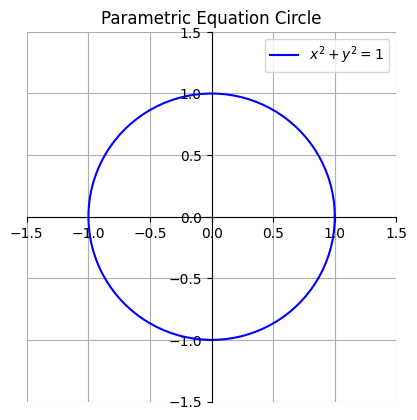

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 0到2pi的角度數組
theta = np.linspace(0, 2 * np.pi, 100)

# 計算圓的x、y座標
radius = 1.0
x = radius * np.cos(theta)
y = radius * np.sin(theta)

#plot
fig, ax = plt.subplots()

ax.plot(x, y, label='$x^2+y^2=1$', color='blue')

# 設置十字座標軸
ax.set_aspect('equal')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_title('Parametric Equation Circle')
ax.legend()
plt.grid(True)

plt.savefig('statcomp_hw2_plot10.eps')

11.繪製正方形

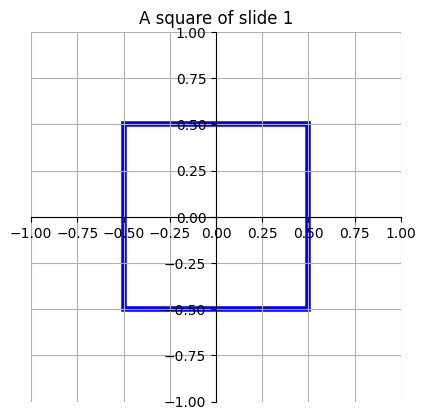

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#直接創建正方形
#ax.set_facecolor("black")
square_side = 1
square = plt.Rectangle((-square_side / 2, -square_side / 2), square_side, square_side, 
                       fill=False, edgecolor='blue',linewidth=4) #太淺可以調linewidth
ax.add_patch(square)

ax.set_aspect(1)#
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_title('A square of slide 1')
plt.grid(True)

plt.savefig('statcomp_hw2_plot11.eps')

# Project : Comparison Theorem
  
Let $S_n =  {\textstyle \sum_{k=1}^{n}}\frac{1}{k} = 1+\frac{1}{2}+\frac{1}{3}+\dots+\frac{1}{n}$  
1.Verify that $\lim_{n\rightarrow \infty} S_n$ diverges.  
2.Let $\gamma_n$ denote the sum of the shaded areas as shown in 圖一. Show that $\gamma_n=S_n-\ln (n+1)$ （可以直接證明）  
3.Verify that $\frac{1}{2}(1-\frac{1}{n+1})<\gamma_n < 1$. (Hint: To show this inequality, it can be done by comparing each shaded area with a larger rectangle and a smaller triangle.)

### 注意事項
1.這些問題都可以證明（show），不過在此以驗證（verify）取代，也就是用程式計算的結果來逼近真實情況。譬如 (1) 的發散（diverge）可以嘗試改變 $n$，從小變大直到很大很大，如 $n=100, 1000, \cdots, 10^6, \cdots$ 並計算 $S_n$，觀察其數值的變化。最好能列印出 $n$ vs. $S_n$，並繪製圖形，方便觀察。  
  
2.問題 2 的證明在 markdown 記錄下來。  
  
3.問題 3 可以畫一張圖展示 $n$ vs. $\gamma_n$, $\frac{1}{2}(1-\frac{1}{n+1})$ ，如圖二，其中 $\gamma_n$ 一直處於中間位置。  
  
4.學習寫程式計算統計問題，最好多做一些這類的小專題，較能學用合一，懂得程式語言用在哪裡、該加強哪一部分。另一方面也會對統計或數學問題有更深一層的體會。

### 1.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


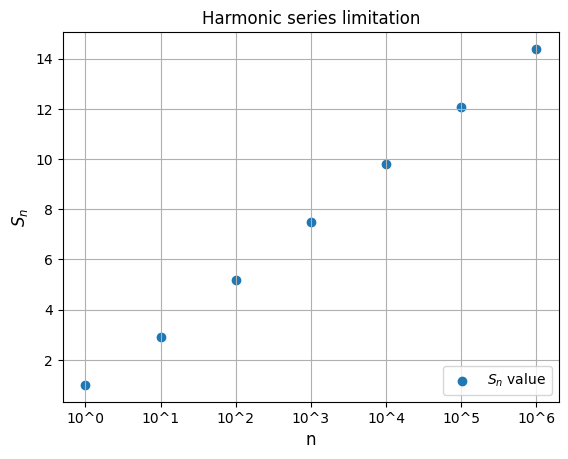

In [13]:
import matplotlib.pyplot as plt
import numpy as np

n = 10**np.arange(7)
Sn_total = [] #建立空的list
for i in n:
    Harmonic_series = (1/np.arange(1,i+1)).sum()
    Sn_total.append(Harmonic_series)
n_len = np.arange(len(n))

plt.scatter(n_len,Sn_total ,label=r'$S_n$ value') #用 n 長度去建立 x 軸 #但會犧牲原本曲線資訊

plt.xticks([0,1,2,3,4,5,6] , 
           ['10^0','10^1','10^2','10^3','10^4','10^5','10^6']
           )

plt.xlabel("n" ,fontsize='large') , plt.ylabel(r"$S_n$" ,fontsize='large')
plt.title("Harmonic series limitation" ,fontsize='large')
plt.grid(True)
plt.legend(loc='lower right')

plt.savefig('statcomp_hw2_plot12.eps')


### 2.  
用積分判別法。調和級數$S_n$的和，為長方形寬為 1 單位、高為 $\frac{1}{n}$ 單位的總面積。長方形的面積總和為:  
$$1+\frac{1}{2}+\frac{1}{3}+\dots+\frac{1}{n}$$  
而曲線 $y=\frac {1}{x}$ 以下、從 1 到正無窮部分的面積由以下瑕積分給出曲線下面積：  
  
### $$ \int _{1}^{\infty} \frac{1}{x} \, dx =\infty $$  

這部分面積小於長方形總面積，長方形的總面積也必定趨於無窮 :  
$${\displaystyle \sum _{k=1}^{n}\,{\frac {1}{k}}\;>\;\int _{1}^{n+1}{\frac {1}{x}}\,dx\;=\;\ln(n+1)}$$  
$\gamma_n$ 因為 $y=\frac {1}{x}$ 曲線以上面積，所以當長方形面積總和 $S_n$ 減去曲線以下面積 $\int _{1}^{n+1}{\frac {1}{x}}\,dx\;=\;\ln(n+1)$ 即為題目所求之 $\gamma_n$。因此證明題目所給之公式 :  
$$\gamma_n=S_n-\ln (n+1)$$

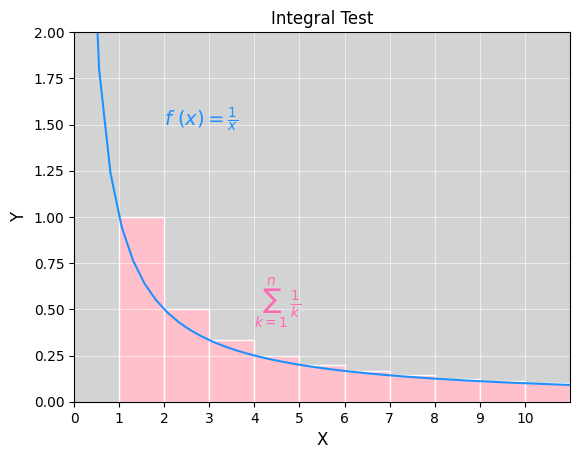

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.axes(facecolor='lightgray')
#line plot
x = np.linspace(-5,20,100)
y = 1/x
plt.plot(x,y,'dodgerblue')
plt.xlim(0,11),plt.ylim(0,2)
plt.text(2,1.5,r'$f\ (x)=\frac{1}{x}$',fontsize=14,rotation=0 ,color='dodgerblue')


#bar plot
n = np.arange(1,11,1)
for i in n:
    Sn_value = 1/i
    plt.bar(i+0.5,Sn_value ,color='pink',width=1,edgecolor='white')
plt.text(4,0.5,r'$\sum _{k=1}^{n}\,{\frac {1}{k}}$',fontsize=14,rotation=0 ,color='hotpink')


def fun_num_to_str(my_numbers) :
    separator = ','
    if isinstance(my_numbers, float) :
        formatted_str = my_numbers.split(',')
        result = [f"{num:.2f}" for num in formatted_str]
        return(result)
    else:
        result = separator.join(str(num) for num in my_numbers)
        result = result.split(',')
        return(result)
x_margin = np.arange(0,11,1)
x_margin_str = fun_num_to_str(x_margin)
plt.xticks(x_margin,x_margin_str)

plt.xlabel("X" ,fontsize='large') , plt.ylabel('Y' ,fontsize='large')
plt.title(label='Integral Test',fontsize='large')
plt.grid(True , linewidth= 0.4 ,color='white')

plt.savefig('statcomp_hw2_plot13.eps')

### 3.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


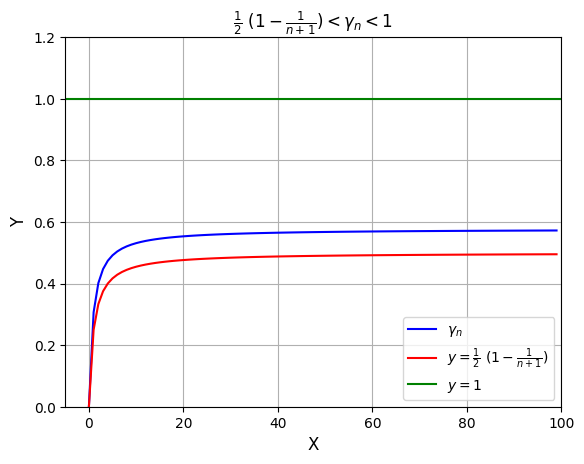

In [15]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(100)
Sn_total = [] #建立空的list
for i in n:
    Harmonic_series = (1/np.arange(1,i+1)).sum()
    Sn_total.append(Harmonic_series)
y = (1/2)*(1-1/(n+1))

plt.plot(n,Sn_total-np.log(n+1) , label='$\gamma_n$' ,color='blue')
plt.plot(n,y ,label=r'$y = \frac{1}{2}\ (1- \frac{1}{n+1} )$' ,color='red')
plt.axhline(1 ,color='green' ,label='$y=1$')

plt.legend(loc='lower right')
plt.xlim(-5,100) , plt.ylim(0,1.2)
plt.xlabel("X" ,fontsize='large') , plt.ylabel('Y' ,fontsize='large')
plt.title(label=r'$\frac{1}{2}\ (1-\frac{1}{n+1})<\gamma_n < 1$',fontsize='large')
plt.grid(True)

plt.savefig('statcomp_hw2_plot14.eps')